In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from ipywidgets import interact
import numpy as np
import cv2 as cv

In [10]:
image = cv.imread('./square.png')

In [11]:
@interact(min_threshold=100, max_threshold=200, aperture=(3,7,2))
def get_contours(min_threshold, max_threshold, aperture):
	# get edges using Canny edge detector
	global edges
	edges = cv.Canny(image, min_threshold, max_threshold, apertureSize=aperture)

	# display original image
	plt.rcParams["figure.figsize"]=15,15
	plt.subplot(121)
	plt.imshow(image, cmap='gray')
	plt.title('Original Image') 
	plt.xticks([])
	plt.yticks([])

	# display detected edges
	plt.subplot(122)
	plt.imshow(edges, cmap='gray')
	plt.title('Edges') 
	plt.xticks([])
	plt.yticks([])

	plt.show()


interactive(children=(IntSlider(value=100, description='min_threshold', max=300, min=-100), IntSlider(value=20…

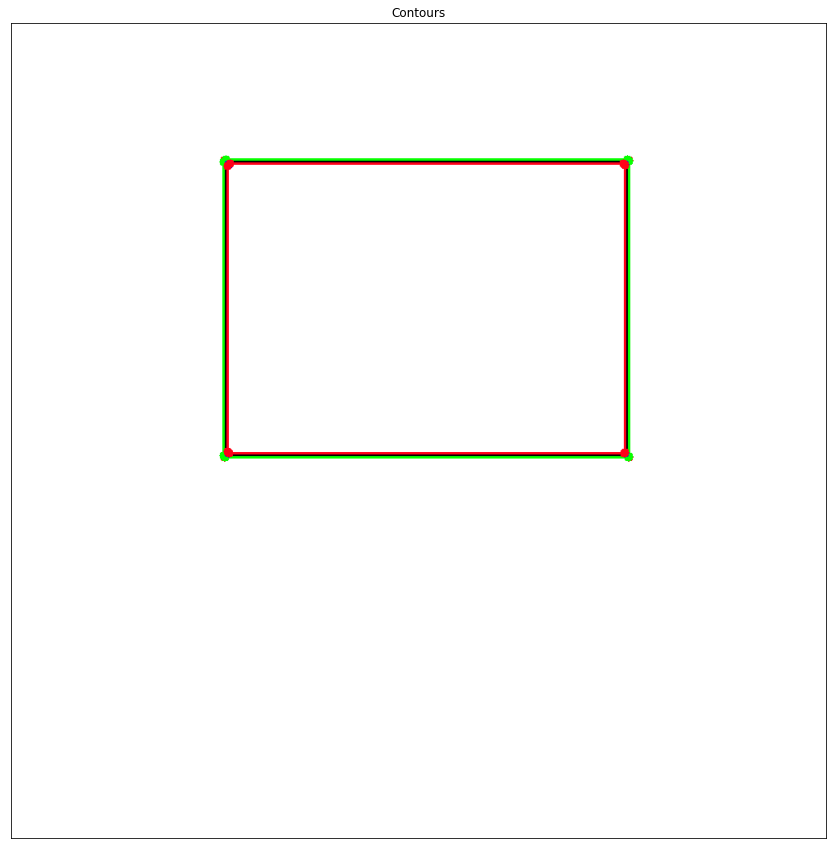

In [21]:
contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# display detected contours
im_contours = image.copy()
cmap = plt.cm.get_cmap('hsv', len(contours),)
for i, group in enumerate(contours):
	group_color = np.multiply(cmap(i), 255)
	cv.drawContours(im_contours, [group], -1, group_color, 2)
	for contour in group:
		cv.circle(im_contours, contour[0], 5, group_color, cv.FILLED)

plt.imshow(im_contours, cmap='gray')
plt.title('Contours')
plt.xticks([])
plt.yticks([])
plt.show()